# 군집화(Clustering)
- 비지도학습으로 정답없이 특징만 가지고, 보유한 데이터로 모델을 구현


In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
import pandas as pd
df = pd.read_csv('../Data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


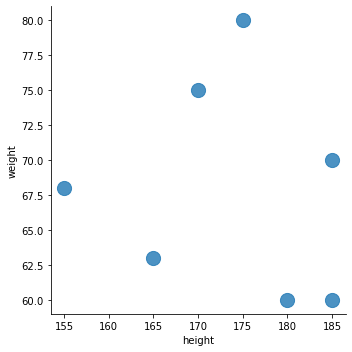

In [74]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
  'height',
  'weight',
  data=df,
  fit_reg=False,
  scatter_kws={'s':200}
)

plt.show()

### k-Means 군집화

In [75]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [76]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
  n_clusters=3
).fit(data_points)

In [77]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [172.5       ,  77.5       ],
       [160.        ,  65.5       ]])

In [78]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,2
4,155,68,2
5,170,75,1
6,175,80,1


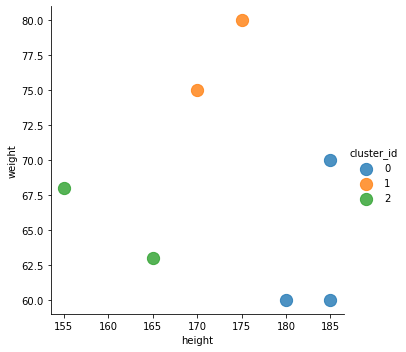

In [79]:
# 시각화
sns.lmplot(
  'height',
  'weight',
  data=df,
  fit_reg=False,
  scatter_kws={'s':150},
  hue='cluster_id'
)



---
### IRIS 군집화 비교

In [80]:
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
# Name을 숫자로 변환하기
iris['label'] = iris['Name'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [82]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [83]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [84]:
# 중싱점 확인
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [85]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [86]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


# 시각화 해보기
cluster id의 일련번호가 틀리게 나올수 있으므로 시각화를 통한 확인이 필요

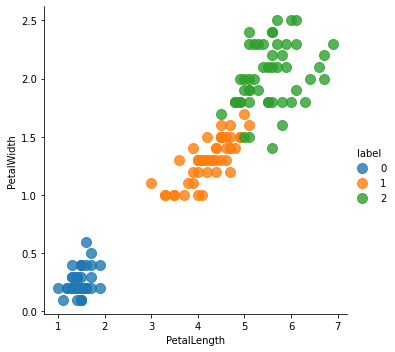

In [87]:
sns.lmplot(
  'PetalLength',
  'PetalWidth',
  data=iris,
  fit_reg=False,
  scatter_kws={'s':100},
  hue='label'
)

plt.show()

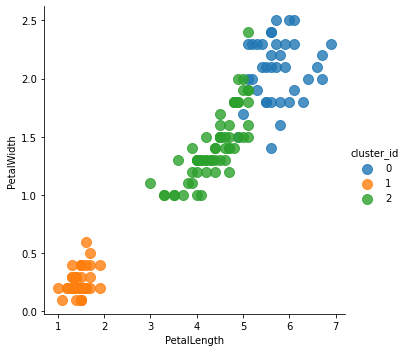

In [88]:
sns.lmplot(
  'PetalLength',
  'PetalWidth',
  data=iris,
  fit_reg=False,
  scatter_kws={'s':100},
  hue='cluster_id'
)

plt.show()

In [94]:
# cluter_id : 0 -> 0, 1->2, 2->1
iris['cluster_id2'] = iris['cluster_id'].map({0:2,2:1,1:0})

In [95]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id,cluster_id2
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1,0


In [98]:
sum(iris['label'] == iris['cluster_id2']) / len(iris)

0.8933333333333333

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id2)

0.8933333333333333